# Exploratory Data Analysis
The dataset contains information about loan applications in New York

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Make everything visible
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
# Limit precision
pd.set_option("display.precision", 2)

## Get to know the variables

In [3]:
header = pd.read_csv("description.csv", delimiter=";", names=["field", "description"])

In [4]:
header

,field,description
0,action_taken_name,"The action taken on the loan or application, such as whether an application was approved or denied. Loan originated means the application resulted in a mortgage. Loan purchased means that the lender bought the loan on the secondary market."
1,agency_name,The federal agency to which the HMDA-reporting institution submits its HMDA data.
2,applicant_ethnicity_name,The ethnicity of the primary applicant.
3,applicant_income_000s,"The gross annual income that the lender relied on when evaluating the creditworthiness of the applicant, rounded to the nearest thousand."
4,applicant_race_name_1,The first listed race for the primary applicant.
5,applicant_sex_name,The sex of the primary applicant.
6,co_applicant_ethnicity_name,The ethnicity of the co-applicant.
7,co_applicant_race_name_1,The first listed race for the co-applicant.
8,co_applicant_sex_name,The sex of the co-applicant.
9,county_name,The name of the county containing the property.


In [5]:
# Read the actual data and convert data types to most appropriate ones
df = pd.read_csv("sample.csv").convert_dtypes()

In [6]:
# First glimpse of data types and how many columns are actually filled with data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175862 entries, 0 to 175861
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   action_taken_name               175862 non-null  string 
 1   agency_name                     175862 non-null  string 
 2   applicant_ethnicity_name        175862 non-null  string 
 3   applicant_race_name_1           175862 non-null  string 
 4   applicant_sex_name              175862 non-null  string 
 5   applicant_income_000s           151344 non-null  Int64  
 6   co_applicant_ethnicity_name     175862 non-null  string 
 7   co_applicant_race_name_1        175862 non-null  string 
 8   co_applicant_sex_name           175862 non-null  string 
 9   county_name                     175377 non-null  string 
 10  denial_reason_name_1            23067 non-null   string 
 11  denial_reason_name_2            4650 non-null    string 
 12  denial_reason_na

In [7]:
# As some columns have only a few data entries,
# let's calculate the percentage of missing values for each column
def percentage_isna(dataframe):
    return 100 * dataframe.isna().sum()/ dataframe.shape[0]
percentage_isna(df)

action_taken_name                  0.00
agency_name                        0.00
applicant_ethnicity_name           0.00
applicant_race_name_1              0.00
applicant_sex_name                 0.00
applicant_income_000s             13.94
co_applicant_ethnicity_name        0.00
co_applicant_race_name_1           0.00
co_applicant_sex_name              0.00
county_name                        0.28
denial_reason_name_1              86.88
denial_reason_name_2              97.36
denial_reason_name_3              99.48
hoepa_status_name                  0.00
lien_status_name                   0.00
loan_purpose_name                  0.00
loan_type_name                     0.00
msamd_name                         8.33
owner_occupancy_name               0.00
preapproval_name                   0.00
property_type_name                 0.00
purchaser_type_name                0.00
hud_median_family_income           0.39
loan_amount_000s                   0.00
number_of_1_to_4_family_units      0.52


## First observations
Most columns provide enough data.

Interestingly, almost 14% of the applicant's annual gross income isn't provided which seems counter-intuitive as one would expect that the income should play an important role. 


Apperently, most loan applications don't have a denial reasons.
Possible hypothesis: Most applications weren't denied.

Over 8% of the entries don't offer more detailed geographical data than the county name (which is missing only in 0.28% of all applications).

All other features are more than 99% filled with data :)

In [8]:
# Let's have a first look into the actual data
df.head()

,action_taken_name,agency_name,applicant_ethnicity_name,applicant_race_name_1,applicant_sex_name,applicant_income_000s,co_applicant_ethnicity_name,co_applicant_race_name_1,co_applicant_sex_name,county_name,denial_reason_name_1,denial_reason_name_2,denial_reason_name_3,hoepa_status_name,lien_status_name,loan_purpose_name,loan_type_name,msamd_name,owner_occupancy_name,preapproval_name,property_type_name,purchaser_type_name,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population
0,Application denied by financial institution,Consumer Financial Protection Bureau,Not Hispanic or Latino,White,Female,176,No co-applicant,No co-applicant,No co-applicant,Chautauqua County,Collateral,<NA>,<NA>,Not a HOEPA loan,Secured by a first lien,Refinancing,Conventional,<NA>,Not owner-occupied as a principal dwelling,Not applicable,One-to-four family dwelling (other than manufactured housing),Loan was not originated or was not sold in calendar year covered by register,60000,235,2605,930,6.85,2979
1,Application withdrawn by applicant,Department of Housing and Urban Development,Not Hispanic or Latino,White,Male,53,No co-applicant,No co-applicant,No co-applicant,Erie County,<NA>,<NA>,<NA>,Not a HOEPA loan,Secured by a first lien,Home purchase,FHA-insured,"Buffalo, Cheektowaga, Niagara Falls - NY",Owner-occupied as a principal dwelling,Not applicable,One-to-four family dwelling (other than manufactured housing),Loan was not originated or was not sold in calendar year covered by register,69000,108,2053,821,33.58,4416
2,Loan originated,Consumer Financial Protection Bureau,Not Hispanic or Latino,White,Male,223,Not Hispanic or Latino,White,Female,Queens County,<NA>,<NA>,<NA>,Not a HOEPA loan,Secured by a first lien,Home purchase,Conventional,"New York, Jersey City, White Plains - NY, NJ",Owner-occupied as a principal dwelling,Not applicable,One-to-four family dwelling (other than manufactured housing),Loan was not originated or was not sold in calendar year covered by register,71300,659,497,387,49.96,1363
3,Loan originated,Consumer Financial Protection Bureau,Not Hispanic or Latino,Asian,Female,43,No co-applicant,No co-applicant,No co-applicant,Queens County,<NA>,<NA>,<NA>,Not a HOEPA loan,Secured by a first lien,Home purchase,Conventional,"New York, Jersey City, White Plains - NY, NJ",Owner-occupied as a principal dwelling,Not applicable,One-to-four family dwelling (other than manufactured housing),Loan was not originated or was not sold in calendar year covered by register,71300,103,251,558,32.09,1960
4,Loan originated,National Credit Union Administration,Not Hispanic or Latino,White,Male,72,No co-applicant,No co-applicant,No co-applicant,Steuben County,<NA>,<NA>,<NA>,Not a HOEPA loan,Secured by a first lien,Home purchase,Conventional,<NA>,Owner-occupied as a principal dwelling,Preapproval was requested,One-to-four family dwelling (other than manufactured housing),Loan was not originated or was not sold in calendar year covered by register,60000,45,1514,1003,2.12,3391


In [9]:
# Let's check for duplicates
sum(df.duplicated())

189

Okay, 189 out of 175,862 doesn't look suscipious, so I assume the data collection worked properly and there is no systematic problem with duplicates.

Let's move on, after we finished a few sanity checks.
## Categorical Data

In [10]:
# Let's check the categorical data first
categorical = df.select_dtypes('string').columns

In [11]:
df.describe(include='string')

,action_taken_name,agency_name,applicant_ethnicity_name,applicant_race_name_1,applicant_sex_name,co_applicant_ethnicity_name,co_applicant_race_name_1,co_applicant_sex_name,county_name,denial_reason_name_1,denial_reason_name_2,denial_reason_name_3,hoepa_status_name,lien_status_name,loan_purpose_name,loan_type_name,msamd_name,owner_occupancy_name,preapproval_name,property_type_name,purchaser_type_name
count,175862,175862,175862,175862,175862,175862,175862,175862,175377,23067,4650,920,175862,175862,175862,175862,161220,175862,175862,175862,175862
unique,7,6,4,7,4,5,8,5,62,9,9,9,2,4,3,4,14,3,3,3,10
top,Loan originated,Consumer Financial Protection Bureau,Not Hispanic or Latino,White,Male,No co-applicant,No co-applicant,No co-applicant,Suffolk County,Debt-to-income ratio,Credit history,Other,Not a HOEPA loan,Secured by a first lien,Home purchase,Conventional,"New York, Jersey City, White Plains - NY, NJ",Owner-occupied as a principal dwelling,Not applicable,One-to-four family dwelling (other than manufactured housing),Loan was not originated or was not sold in calendar year covered by register
freq,90982,70850,128400,113423,96939,92224,92224,92224,18063,6402,1115,271,175835,136068,87947,134915,64380,156700,145900,170677,102132


## Some more quick observations

- Indeed, most of the loan applications aren't rejected because the most frequent `action_taken_name` is "Loan originated".
- Most applicants are white men without hispanic or Latino ethnicity which filed the application without a co-applicant.
- Out of the rejected applications, the top denial reasons are debt-to-income ratio and credit history which sounds reasonably.
- Almost all loans are "not a HOEPA loan" (only 27 actually are).
- Most loans are conventional loans secured by a first lien used for home purchases (owner-occupied as a principal dwelling in a 1-4 family dwelling).

What is surprising is that the most frequent occuring county is "Suffolk County" but the top occuring MSA/MD region is "New York, Jersey City, White Plains - NY, NJ".

As except the geographical features all categorical variables have only up to 10 distinct values,
let's inspect them visually:

In [12]:
# Utility function to allow visually exploring the value distribution of the categorical features.
def count_plot(data, feature_name):
    fig, ax = plt.subplots()
    # Order by frequency
    sns.countplot(data[feature_name], order=data[feature_name].value_counts().index, ax=ax)
    
    # Show percentages
    total = len(data[feature_name])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 4 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 10)
    # Rotate long labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.show()

### Loan application process outcomes


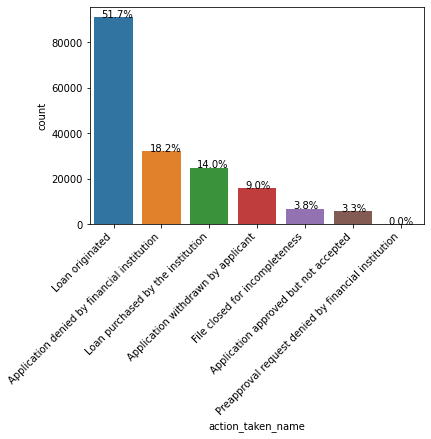

In [13]:
count_plot(df, 'action_taken_name')

There are basically two groups of loan actions:
- successful applications:
    - Loan originated
    - Loan purchased by the institution
    - Application approved but not accepted
- or unsuccessful applications:
    - Application denied by financial institution
    - Application withdrawn by applicant
    - File closed for incompleteness
    - Preapproval request denied by financial institution


In [14]:
# Let's check if there were indeed that less preapproval requests denied
df.action_taken_name.value_counts()

Loan originated                                        90982
Application denied by financial institution            32005
Loan purchased by the institution                      24682
Application withdrawn by applicant                     15765
File closed for incompleteness                          6682
Application approved but not accepted                   5743
Preapproval request denied by financial institution        3
Name: action_taken_name, dtype: Int64

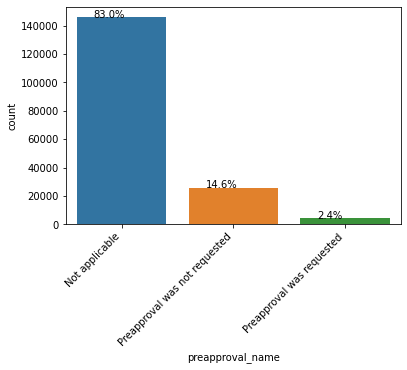

In [15]:
# Let's dig deeper
count_plot(df, 'preapproval_name')

In [16]:
df.preapproval_name.value_counts()['Preapproval was requested']

4218

In [17]:
# Applications with requested but denied preapproval
df[(df.preapproval_name == 'Preapproval was requested') & (df.action_taken_name == 'Preapproval request denied by financial institution')]

,action_taken_name,agency_name,applicant_ethnicity_name,applicant_race_name_1,applicant_sex_name,applicant_income_000s,co_applicant_ethnicity_name,co_applicant_race_name_1,co_applicant_sex_name,county_name,denial_reason_name_1,denial_reason_name_2,denial_reason_name_3,hoepa_status_name,lien_status_name,loan_purpose_name,loan_type_name,msamd_name,owner_occupancy_name,preapproval_name,property_type_name,purchaser_type_name,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population
91976,Preapproval request denied by financial institution,Consumer Financial Protection Bureau,Not Hispanic or Latino,White,Male,115,No co-applicant,No co-applicant,No co-applicant,Erie County,Debt-to-income ratio,<NA>,<NA>,Not a HOEPA loan,Secured by a first lien,Home purchase,Conventional,"Buffalo, Cheektowaga, Niagara Falls - NY",Owner-occupied as a principal dwelling,Preapproval was requested,One-to-four family dwelling (other than manufactured housing),Loan was not originated or was not sold in calendar year covered by register,69000,339,2755,2573,15.97,7641
113354,Preapproval request denied by financial institution,Consumer Financial Protection Bureau,Not Hispanic or Latino,Asian,Male,78,Not Hispanic or Latino,Asian,Female,Suffolk County,Other,<NA>,<NA>,Not a HOEPA loan,Secured by a first lien,Home purchase,Conventional,"Nassau County, Suffolk County - NY",Owner-occupied as a principal dwelling,Preapproval was requested,One-to-four family dwelling (other than manufactured housing),Loan was not originated or was not sold in calendar year covered by register,109000,100,1449,953,85.73,6272
129436,Preapproval request denied by financial institution,National Credit Union Administration,Not Hispanic or Latino,Asian,Male,129,No co-applicant,No co-applicant,No co-applicant,Nassau County,<NA>,<NA>,<NA>,Not a HOEPA loan,Secured by a first lien,Home purchase,Conventional,"Nassau County, Suffolk County - NY",Owner-occupied as a principal dwelling,Preapproval was requested,One-to-four family dwelling (other than manufactured housing),Loan was not originated or was not sold in calendar year covered by register,109000,386,739,706,13.48,2159


Obviously, most applications don't need a preapproval (not applicable)
or the preapproval was actually not requested.

Only 3 out of the 4218 applications where a preapproval was requested were actually denied.

## **Insight:** It is extremely rare that a preapproval is requested and gets rejected.

Let's get back to the other types of loan actions:

In [18]:
# Count of 'File closed for incompleteness'
df[df.action_taken_name == 'File closed for incompleteness'].shape

(6682, 28)

In [19]:
# Count of 'Application withdrawn by applicant'
df[df.action_taken_name == 'Application withdrawn by applicant'].shape

(15765, 28)

Let's get rid of incomplete and withdrawn applications as they potentially pollute our data

As I don't have enough domain knowledge about preapprovals, let's drop these 3 rows as well.

The action 'Loan purchased by the institution' indicates that the loan was bought in the secondary market
which might be handled separately compared to the first market.

In [20]:
dropped_actions = ['File closed for incompleteness',
                   'Application withdrawn by applicant',
                   'Preapproval request denied by financial institution',
                   'Loan purchased by the institution']
df = df[df.action_taken_name.isin(dropped_actions) == False]
df.shape

(128730, 28)

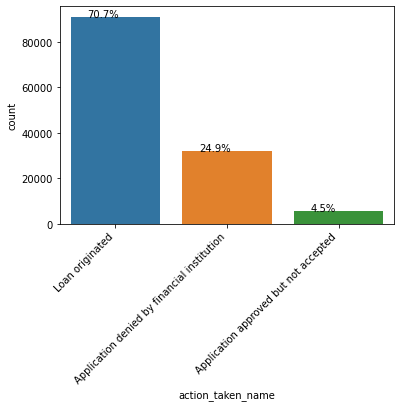

In [21]:
# We end up with the following 3 categories
count_plot(df, 'action_taken_name')

In [22]:
# Shorten some really long texts
df = df.replace({
    "Information not provided by applicant in mail, Internet, or telephone application": "Not provided",
    "One-to-four family dwelling (other than manufactured housing)": "1-4 family dwelling",
}
)

In [23]:
# Let's group 'Loan originated' and 'Application approved but not accepted' together as successful applications
successful_mask = (df.action_taken_name == 'Loan originated') | (df.action_taken_name == 'Application approved but not accepted')
successful = df[successful_mask]
denied = df[df.action_taken_name == 'Application denied by financial institution']

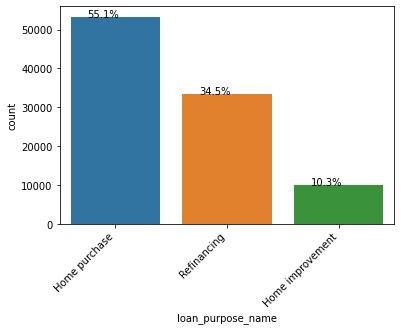

In [24]:
count_plot(successful,'loan_purpose_name')

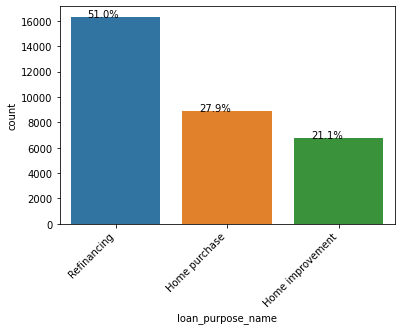

In [25]:
count_plot(denied,'loan_purpose_name')

**Insight:** The loan type home purchase (55%) is more often approved compared to refinancing (34.5%) or home improvements (10.3%).
51% of all denied loan applications were of the type refinancing but only 27.9% were of the type home purchase and 21.1% home improvement.

## What are the top reasons for denial?

In [26]:
# Count all denial reasons
reasons = denied.denial_reason_name_1.value_counts()
reasons += denied.denial_reason_name_2.value_counts()
reasons += denied.denial_reason_name_3.value_counts()
reasons

Debt-to-income ratio                              7470
Credit history                                    6825
Collateral                                        5174
Credit application incomplete                     3117
Other                                             3099
Unverifiable information                          1200
Insufficient cash (downpayment, closing costs)    1189
Employment history                                 479
Mortgage insurance denied                           82
Name: denial_reason_name_1, dtype: Int64

It seams natural to make a more detailed analysis
whether there is an influence of the demographic data of the applicants and co-applicants
(ethnicity, race, sex), geographical aspects (county and MSA/MD) or
analyzing the other features in detail.

## Numerical data
But, let's have a quick look at the numerical data as well.

In [27]:
numerical = [column for column, dtype in df.dtypes.items() if pd.api.types.is_numeric_dtype(dtype)]

In [28]:
numerical

['applicant_income_000s',
 'hud_median_family_income',
 'loan_amount_000s',
 'number_of_1_to_4_family_units',
 'number_of_owner_occupied_units',
 'minority_population',
 'population']

In [29]:
# Drop missing values
df_clean = df.dropna(subset=numerical)
df_clean.shape

(118272, 28)

In [30]:
# Let's have a quick view at the data distribution
df_clean.describe()

,applicant_income_000s,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population
count,118272.00,118272.00,118272.00,118272.00,118272.00,118272.00,118272.00
mean,138.60,77753.24,277.18,1550.28,1242.61,26.63,4751.72
std,272.98,16184.85,406.79,792.48,598.03,27.33,1856.59
min,1.00,57200.00,1.00,6.00,5.00,0.34,24.00
25%,57.00,69000.00,92.00,1020.00,790.00,7.05,3465.00
50%,89.00,71300.00,190.00,1562.00,1218.00,15.78,4558.00
75%,140.00,82700.00,350.00,2034.00,1655.00,34.13,5880.00
max,9999.00,109000.00,24000.00,6345.00,6454.00,99.93,26588.00


In general, these numbers might have some problems, for example:
- The min and max of the applicant's income look really suspicious.
- There is probably a problem with the data collection or a special semantics to these numbers, especially compared to the more realistic median family income.
- The minimum loan amount seams a bit low.

An outlier detection might be useful.

However, let's see if there are some interesting relationships between the numerical variables:

<AxesSubplot:>

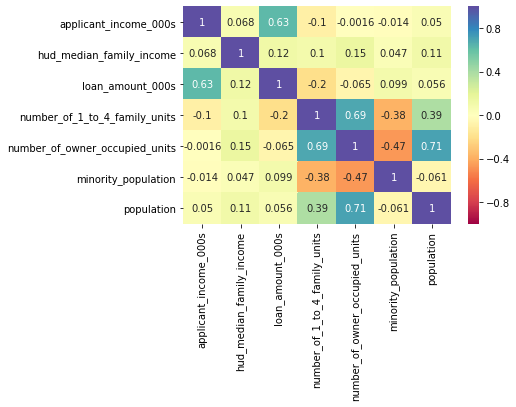

In [31]:
sns.heatmap(df_clean.select_dtypes(['float64' , 'int64']).corr(), annot=True, cmap="Spectral", vmax=1, vmin=-1)

## Further insights:
- There is a positive correlation (0.63) between the applicant income and the loan amount, which makes intuitively sense.
- Furthermore, there is an even stronger correlation (0.69) between the number of 1-4 family units and number of owner-occupied units. A plausible explanation would be that in a residential area with only single and multi-family houses it is more likely that you live in your own house compared to cities where most people rent.
- The number of owner-occupied units is even slightly stronger (0.71) correlated with the population living in the tract,i.e., the more people living in a tract, the more owner-occupied units in the tract.
- Interestingly, this number is also negatively correlated (-0.47) with the percentage of the minority population living in the tract and the same holds true (-0.38) for the number of 1-4 family units. This indicates, that minority population is more likely to live in residential areas with multi-family houses and less likely to live in their own house. 

Let's visualize those relationships:

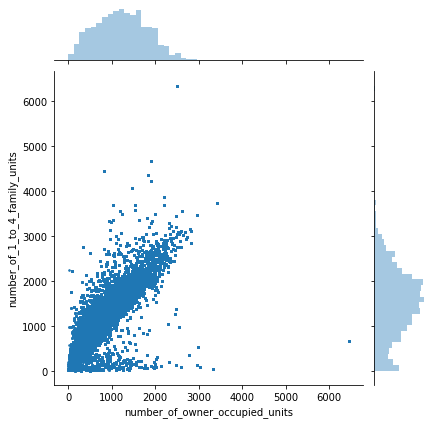

In [32]:
sns.jointplot(data=df_clean, x="number_of_owner_occupied_units", y="number_of_1_to_4_family_units", marker='.', s=10)

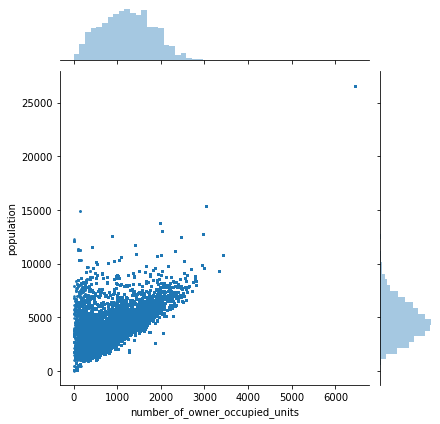

In [33]:
sns.jointplot(data=df_clean, x="number_of_owner_occupied_units", y='population', marker='.', s=10)

However, when we compare the number of owner-occupied units with the minority population instead,
the picture looks a lot different:

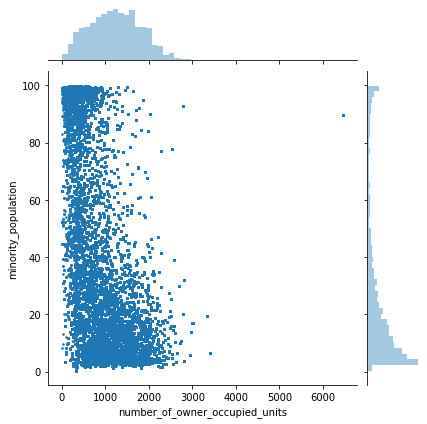

In [34]:
sns.jointplot(data=df_clean, x="number_of_owner_occupied_units", y='minority_population', marker='.', s=10)

Most tracts with a high percentage of minority population have only a small absolute number of owner-occupied units.

But there is an eye-catching outlier! Let's have a closer look...

In [35]:
df_clean[df_clean.number_of_owner_occupied_units > 6000][
    ['county_name', 'msamd_name', 'applicant_race_name_1']].apply(pd.Series.value_counts)

,county_name,msamd_name,applicant_race_name_1
Black or African American,<NA>,<NA>,4.0
Bronx County,9,<NA>,NaN
"New York, Jersey City, White Plains - NY, NJ",<NA>,9,NaN
Not provided,<NA>,<NA>,4.0
White,<NA>,<NA>,1.0


It looks like mainly Black or African Americans live in The Bronx and apply for loans.

Let's answer two more questions within this exploration (to inspect some more outliers): 

In [36]:
# In which area (i.e. tract) is the lowest number of owner occupied units?
df_clean[df_clean.number_of_owner_occupied_units == 5][['county_name', 'msamd_name']].apply(pd.Series.value_counts)

,county_name,msamd_name
New York County,11,<NA>
"New York, Jersey City, White Plains - NY, NJ",<NA>,11


In [37]:
# In which area do the fewest people live?
df_clean[df_clean.population == 24][['county_name', 'msamd_name']].apply(pd.Series.value_counts)

,county_name,msamd_name
Monroe County,1,<NA>
Rochester - NY,<NA>,1


After a first exploration of the data,
some further steps would be necessary to better understand the dataset and its origin.

For example, before a model could be trained to predict the success of an application,
a better data preparation should take place with domain experts.
For example, the applicant's income is missing in almost 14% of the applications
and many unplausible values are contained for this feature as well.
Otherwise, we will end up with "garbage in, garbage out".

However, first of all, I would make sure to clarify the actual business problem that should be tackled
before fixing inconsistencies of the data, normalizing it and
if necessary enriching the data from other sources.

Only then it makes sense to further deep-dive into the data,
form hypotheses about the problem by (visually) analyzing the data
and further feature-engineering.

Subsequently, we can train a predictive model and analyze its outcome w.r.t. a potential bias
(e.g. discrimination based on sex or race) and visualize the results appropriately.

